# Linear regression
This was a good look at how linear regression can be built from scratch, and how it is possible to use it easily by importing a module from SKlearn.

In [1]:
# improting modules
import matplotlib.pyplot as plt

## Manually coded
The code immediately below is the code that was guided through by Codecademy.

In [2]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

In [3]:
def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

In [4]:
#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

The below code calls the step gradient descent, which in turn looked to minimise the less function for both 'b' and 'm'. Inside this, it calls the gradient descent for the number of iterations deemed reasonable.

In [5]:
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for num in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return [b, m]

## Calling the code
This now calls the code using and initial b=0 and m=0 and attempts to optimise this using the learning rate specified and for the number of iterations.

Using a learning rate of 0.01, with 1000 iterations, a gradient of 10.463427732364998 and intercept of 49.60215351339813.


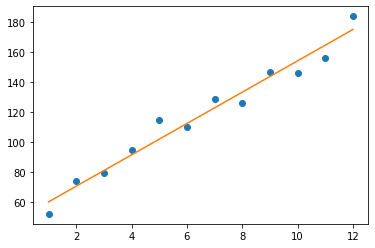

In [9]:
# This is the 
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
learning_rate = 0.01
num_iterations = 1000
b, m = gradient_descent(months, revenue, learning_rate, num_iterations)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

print(f'Using a learning rate of {learning_rate}, with {num_iterations} iterations, a gradient of {m} and intercept of {b}.')

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

## Tweek
This is just a test in looking at the predictions of the regression model with month 15.

In [8]:
test_x = 13
y_predict = m*test_x + b
print(y_predict)

185.6267140341431


## Utilising Scikit-Learn
The below will utilise the linear regression models from SK-Learn for the same prediction.

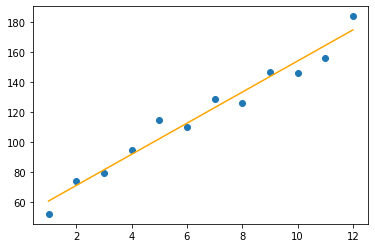

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshaping the x and y calues
X = np.array(months)
X = X.reshape(-1,1)
y = np.array(revenue)
y = y.reshape(-1,1)

# initiate the model
line_fitter = LinearRegression()
line_fitter.fit(X, y)
y_predict_rgr = line_fitter.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predict_rgr, color='orange')
plt.show()

# Portfolio project
This project was somehwta guided but was left to my own devices for coding

## Honey Production
Now that you have learned how linear regression works, let’s try it on an example of real-world data.

As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees.

[-88303.18915238] 181208083.1073298


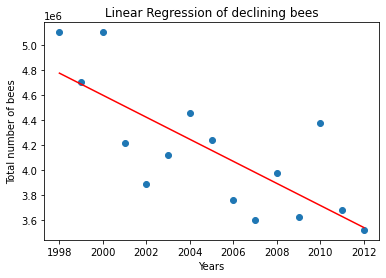

186545.34494683146


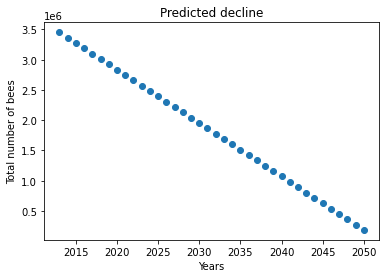

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("honeyproduction.csv")

prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()
#print(prod_per_year)
X = prod_per_year['year']
X = X.values.reshape(-1, 1)
y = prod_per_year['totalprod']

regr = linear_model.LinearRegression()
regr.fit(X,y)

# Print the 'm' and 'b' of the graphs
print(regr.coef_, regr.intercept_)

# Using the model to predict the values of 'y'
y_predict = regr.predict(X)

# Plotting the data and the linear regression model
plt.scatter(X,y)
plt.plot(X, y_predict, color='r')
plt.title('Linear Regression of declining bees')
plt.xlabel('Years')
plt.ylabel('Total number of bees')
plt.show()

# Predicting population out to 2050
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1, 1)

# Using the current model trained above 
future_predict = regr.predict(X_future)

# Printing the value for 2050
print(future_predict[-1])

# Plotting the prediction to 2050
plt.scatter(X_future, future_predict)
plt.title('Predicted decline')
plt.xlabel('Years')
plt.ylabel('Total number of bees')
plt.show()

## Manual calculation
Using the coefficients to manually get values of 2050 predictions

In [26]:
print(2050*regr.coef_ + regr.intercept_)

[186545.34494683]
